<a href="https://colab.research.google.com/github/sarthakkaushik/Diploma-Program-in-ML-and-AI/blob/main/Fashion_MNIST_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
#Importing all the libraries
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow.python.keras.layers.normalization.batch_normalization import BatchNormalization
from tensorflow.python.keras.layers.core import Dropout
#Creating the model
from tensorflow import keras
from tensorflow.keras import layers

In [3]:
#Import the data
from tensorflow.keras.datasets import fashion_mnist

In [45]:
(train_data, train_labels), (test_data,test_labels) = fashion_mnist.load_data()

In [10]:
train_data[0].shape, train_labels[0]

((28, 28), 9)

9

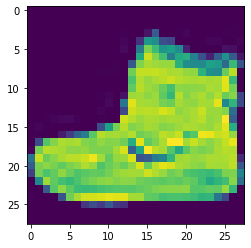

In [16]:
#Plot a single sample
import matplotlib.pyplot as plt
plt.imshow(train_data[0])
# Check lable
train_labels[0]

In [17]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# How many classes are there (this'll be our output shape)?
len(class_names)

10

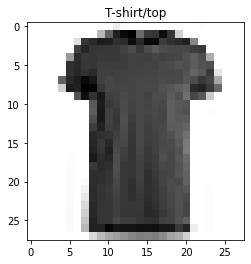

In [18]:
# Plot an example image and its label
plt.imshow(train_data[17], cmap=plt.cm.binary) # change the colours to black & white
plt.title(class_names[train_labels[17]]);

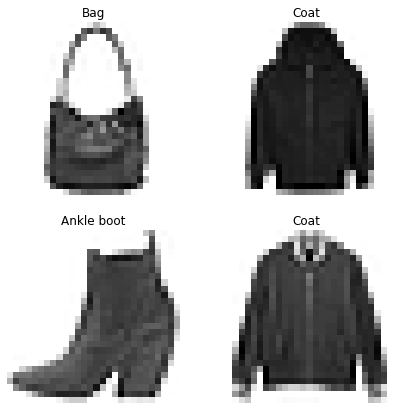

In [23]:
#Plot multiple random imgae
import random
plt.figure(figsize=(7,7))

for i in range(4):
  ax= plt.subplot(2,2,i+1)
  rand_index=random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

In [34]:
#Building a multo- class classification model

model= tf.keras.Sequential([
                            layers.Flatten(input_shape=(28,28)),
                            layers.Dense(4,activation='relu'),
                            layers.Dense(4,activation='relu'),
                            layers.Dense(10,activation='softmax')
])

#Compile the model

model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
    )

non_norm_history= model.fit(train_data,train_labels,epochs=50,
                            validation_data=(test_data, test_labels))

Epoch 1/50
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3423 - accuracy: 0.0987 - val_loss: 2.3023 - val_accuracy: 0.0985
Epoch 2/50
1875/1875 [==============================] - 5s 3ms/step - loss: 1.9790 - accuracy: 0.1962 - val_loss: 1.7548 - val_accuracy: 0.2424
Epoch 3/50
1875/1875 [==============================] - 5s 3ms/step - loss: 1.6832 - accuracy: 0.2745 - val_loss: 1.6244 - val_accuracy: 0.3080
Epoch 4/50
1875/1875 [==============================] - 5s 3ms/step - loss: 1.5989 - accuracy: 0.3053 - val_loss: 1.5722 - val_accuracy: 0.3200
Epoch 5/50
1875/1875 [==============================] - 5s 3ms/step - loss: 1.5631 - accuracy: 0.3106 - val_loss: 1.5481 - val_accuracy: 0.3192
Epoch 6/50
1875/1875 [==============================] - 5s 3ms/step - loss: 1.5424 - accuracy: 0.3144 - val_loss: 1.5331 - val_accuracy: 0.3102
Epoch 7/50
1875/1875 [==============================] - 5s 3ms/step - loss: 1.5267 - accuracy: 0.3140 - val_loss: 1.5183 - val_accuracy:

In [35]:
#Check th model summary
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_16 (Dense)            (None, 4)                 3140      
                                                                 
 dense_17 (Dense)            (None, 4)                 20        
                                                                 
 dense_18 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [37]:
# CHeck the min and max value of yor train and test data
train_data.min(), train_data.max()

(0, 255)

In [46]:
#Scaling your input data between 0 and 1
train_data_norm=train_data/255.0
test_data_norm=test_data/255.0

In [47]:
# CHeck the min and max value of yor train and test data
train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [51]:
#Now are data is notmalized lets train the data again on the model

model_2= tf.keras.Sequential([
                              layers.Flatten(input_shape=(28,28)),
                              layers.Dense(100, activation='relu'),
                              layers.Dense(100, activation='relu'),
                              layers.Dense(10, activation = 'softmax')
])

#Lets compile the model agan

model_2.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

#Lets fit the model

norm_history=model_2.fit(train_data_norm, train_labels,
            epochs=10,
            validation_data=(test_data_norm,test_labels))

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4969 - accuracy: 0.8221 - val_loss: 0.4131 - val_accuracy: 0.8530
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3702 - accuracy: 0.8647 - val_loss: 0.4339 - val_accuracy: 0.8365
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3361 - accuracy: 0.8766 - val_loss: 0.3776 - val_accuracy: 0.8648
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3143 - accuracy: 0.8834 - val_loss: 0.3607 - val_accuracy: 0.8671
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2954 - accuracy: 0.8903 - val_loss: 0.3438 - val_accuracy: 0.8749
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2823 - accuracy: 0.8952 - val_loss: 0.3626 - val_accuracy: 0.8701
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2692 - accuracy: 0.8986 - val_loss: 0.3361 - val_accuracy:

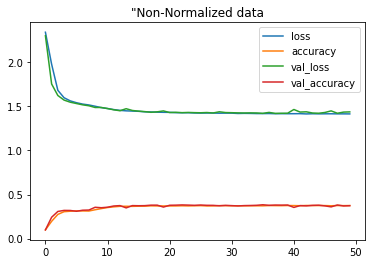

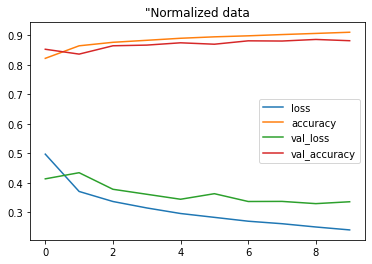

In [53]:
#Lets plot the result.
pd.DataFrame(non_norm_history.history).plot(title='"Non-Normalized data')
#Lets plot the result.
pd.DataFrame(norm_history.history).plot(title='"Normalized data')

In [57]:
#Fiding the ideal learning rate

#create model

model_3= tf.keras.Sequential([
                              layers.Flatten(input_shape=(28,28)),
                              layers.Dense(20,activation='relu'),
                              layers.Dense(20,activation='relu'),
                              layers.Dense(10,activation='softmax')
])

#Compile the model

model_3.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

#Create a callback to find the best learning rate
lr_scheduler= tf.keras.callbacks.LearningRateScheduler(lambda epoch : 1e-3 *10**(epoch/20))

#Fit the model

find_lr_histroy=model_3.fit(train_data_norm,train_labels,
                           epochs=40,
                           validation_data=(test_data_norm,test_labels),
                           callbacks=[lr_scheduler]
)

Epoch 1/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5983 - accuracy: 0.7922 - val_loss: 0.4731 - val_accuracy: 0.8353 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4325 - accuracy: 0.8475 - val_loss: 0.4606 - val_accuracy: 0.8352 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4007 - accuracy: 0.8581 - val_loss: 0.4199 - val_accuracy: 0.8525 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3836 - accuracy: 0.8623 - val_loss: 0.4134 - val_accuracy: 0.8559 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3687 - accuracy: 0.8673 - val_loss: 0.4075 - val_accuracy: 0.8554 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3585 - accuracy: 0.8711 - val_loss: 0.3976 - val_accuracy: 0.8643 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 5s

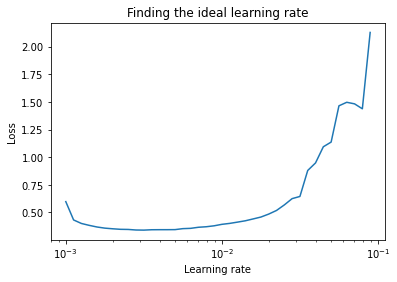

In [59]:
# Plot the learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt
lrs = 1e-3 * (10**(np.arange(40)/20))
plt.semilogx(lrs, find_lr_histroy.history["loss"]) # want the x-axis to be log-scale
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate");

In [62]:
#ideal learning rate = lr: 0.0045
# train the mdoel with same learning rate 

#Fiding the ideal learning rate

#create model

model_4= tf.keras.Sequential([
                              layers.Flatten(input_shape=(28,28)),
                              layers.Dense(20,activation='relu'),
                              layers.Dense(20,activation='relu'),
                              layers.Dense(10,activation='softmax')
])

#Compile the model

model_4.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(0.0045 ),
    metrics=['accuracy']
)

#Create a callback to find the best learning rate
# lr_scheduler= tf.keras.callbacks.LearningRateScheduler(lambda epoch : 1e-3 *10**(epoch/20))

#Fit the model

ideal_lr_histroy=model_4.fit(train_data_norm,train_labels,
                           epochs=40,
                           validation_data=(test_data_norm,test_labels),
                          #  callbacks=[lr_scheduler]
)

Epoch 1/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5848 - accuracy: 0.7911 - val_loss: 0.4812 - val_accuracy: 0.8312
Epoch 2/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4574 - accuracy: 0.8380 - val_loss: 0.4899 - val_accuracy: 0.8228
Epoch 3/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4343 - accuracy: 0.8453 - val_loss: 0.4787 - val_accuracy: 0.8353
Epoch 4/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4205 - accuracy: 0.8505 - val_loss: 0.4683 - val_accuracy: 0.8313
Epoch 5/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4092 - accuracy: 0.8519 - val_loss: 0.4460 - val_accuracy: 0.8420
Epoch 6/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4027 - accuracy: 0.8556 - val_loss: 0.4417 - val_accuracy: 0.8420
Epoch 7/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3949 - accuracy: 0.8563 - val_loss: 0.4344 - val_accuracy:

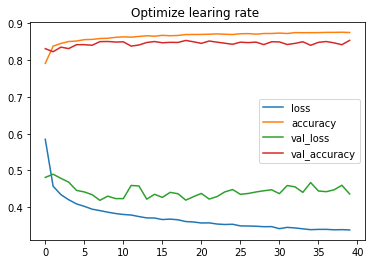

In [63]:
#Lets plot the result.
pd.DataFrame(ideal_lr_histroy.history).plot(title='Optimize learing rate ')